In [41]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

url = "https://raw.githubusercontent.com/umaimehm/Intro_to_AI_2021/main/assignment1/Ruter_data.csv"

#Parse and remove unnecessary values for our 5 unique features
df = pd.read_csv(url, sep=';')
#Replace empty with Na and removes all Na values (drops all the rows and resets the index)
#converts to datetime first to catch the null values
df['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'] = pd.to_datetime(df['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'], errors='coerce')
df['Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra'] = pd.to_datetime(df['Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra'], errors='coerce')
df = df.drop(["Holdeplass_Fra", "Holdeplass_Til","Linjetype","Linjefylke","Område","Fylke","Tidspunkt_Faktisk_Avgang_Holdeplass_Fra","Tidspunkt_Planlagt_Avgang_Holdeplass_Fra","Linjenavn", "Linjeretning"], axis=1)
df = df.replace(r'^\s*$', np.nan, regex=True) 
df = df.dropna()
df = df.reset_index(drop=True)

In [42]:
#removes negative values in 'Passasjerer_ombord'
for index, row in df.iterrows():
    row['Passasjerer_Ombord'] = pd.to_numeric(row['Passasjerer_Ombord'])
    if row['Passasjerer_Ombord'] < 0:
        df.loc[index, 'Passasjerer_Ombord'] = row['Passasjerer_Ombord']*-1


In [43]:
#How many departues per day (dep_per_day)
dfdato = df['Dato'].value_counts().rename_axis('Dato').to_frame('Antall')
dfdato.head(20)

,Antall
Dato,
18/08/2020,110
19/08/2020,106
24/08/2020,100
28/08/2020,98
29/07/2020,97
17/07/2020,95
20/08/2020,94
17/08/2020,94
21/08/2020,91


<function matplotlib.pyplot.show(close=None, block=None)>

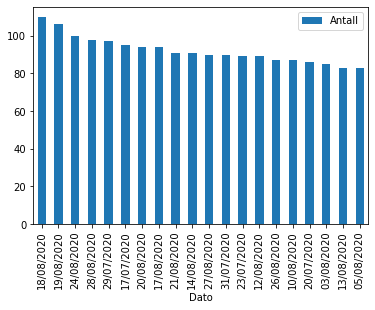

In [44]:
# Plot for hvor mange avganger det er per dato
dfdato1 = dfdato.head(20)
dfdato1.plot.bar()
plt.show

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 [Text(0, 0, 'Bærum'),
  Text(1, 0, 'Bjerke'),
  Text(2, 0, 'St.Hanshaugen'),
  Text(3, 0, 'Indre Østfold'),
  Text(4, 0, 'Ullensaker'),
  Text(5, 0, 'Sentrum'),
  Text(6, 0, 'Eidsvoll'),
  Text(7, 0, 'Lørenskog'),
  Text(8, 0, 'Asker'),
  Text(9, 0, 'Lillestrøm'),
  Text(10, 0, 'Rælingen'),
  Text(11, 0, 'Alna'),
  Text(12, 0, 'Aurskog-Høland'),
  Text(13, 0, 'Gamle Oslo'),
  Text(14, 0, 'Nannestad'),
  Text(15, 0, 'Hurdal'),
  Text(16, 0, 'Gjerdrum'),
  Text(17, 0, 'Enebakk'),
  Text(18, 0, 'Stovner'),
  Text(19, 0, 'Nes'),
  Text(20, 0, 'Grünerløkka'),
  Text(21, 0, 'Nordmarka'),
  Text(22, 0, 'Grorud'),
  Text(23, 0, 'Ullern'),
  Text(24, 0, 'Vestre Aker'),
  Text(25, 0, 'Nittedal'),
  Text(26, 0, 'Nordstrand'),
  Text(27, 0, 'Nordre Follo'),
  Text(28, 0, 'Sagene'),
  Text(29, 0, 'Søndre Nordstrand'),
  Text(30, 0, 'Nordre Aker')

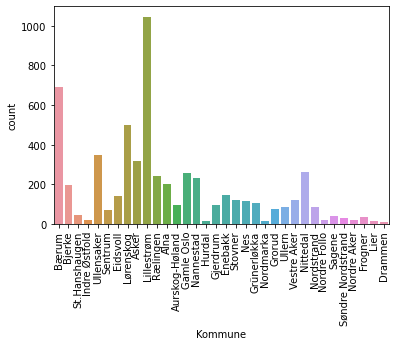

In [45]:
# unique feature, here you wil see how many departues there are from the different "kommune" (dep_per_kommune)
df['Kommune'].value_counts()
sns.countplot(x='Kommune', data=df)
plt.xticks(rotation=90)

In [46]:
#Creates a Delay column 
df['delay'] = df['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'] - df['Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra']
df.head()


,TurId,Dato,Kommune,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord,delay
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Bærum,2021-09-27 10:53:53,2021-09-27 10:53:00,112,5,0 days 00:00:53
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Bærum,2021-09-27 13:12:20,2021-09-27 13:12:00,112,5,0 days 00:00:20
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Bærum,2021-09-27 10:18:56,2021-09-27 10:19:00,112,6,-1 days +23:59:56
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Bærum,2021-09-27 13:52:04,2021-09-27 13:51:00,112,10,0 days 00:01:04
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Bærum,2021-09-27 07:34:13,2021-09-27 07:33:00,112,10,0 days 00:01:13


In [47]:
#Fjerner negative dager i delay og setter den til 00:00:00
for index, row in df.iterrows():
    if row['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'] < row['Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra']:
        df.loc[index, 'delay'] = pd.to_datetime("00:00:00") - pd.to_datetime("00:00:00")

#Lister opp alle nullverdier i delay kolonnen
print(df[df['delay'].isnull()])

Empty DataFrame
Columns: [TurId, Dato, Kommune, Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra, Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra, Kjøretøy_Kapasitet, Passasjerer_Ombord, delay]
Index: []


In [48]:

#Setter nullverdier til 00:00:00 
df['delay'] = df['delay'].fillna("00:00:00")


Empty DataFrame
Columns: [TurId, Dato, Kommune, Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra, Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra, Kjøretøy_Kapasitet, Passasjerer_Ombord, delay]
Index: []


<AxesSubplot:xlabel='Busser', ylabel='Forsinkelse i sek'>

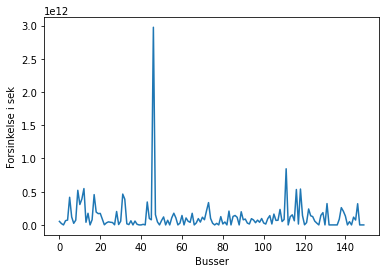

In [49]:
# plot for delay
delay_plot = df['delay'].head(150)
plt.xlabel("Busser")
plt.ylabel("Forsinkelse i sek")
delay_plot.plot.line()


<AxesSubplot:xlabel='Busser', ylabel='Antall Passasjerer'>

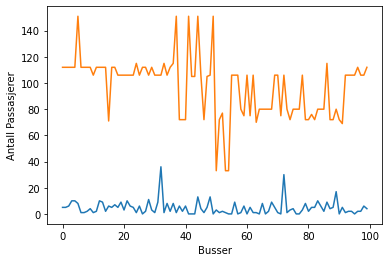

In [50]:
df_P = df['Passasjerer_Ombord'].head(100)
df_K = df['Kjøretøy_Kapasitet'].head(100)
plt.xlabel("Busser")
plt.ylabel("Antall Passasjerer")
df_P.plot()
df_K.plot()
#Blue : antall passasjerer ombord, orange: kapasitet for passasjerer

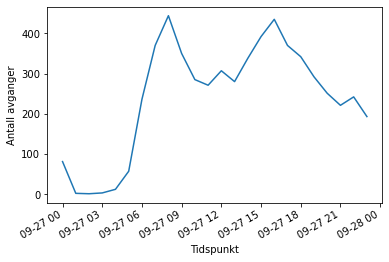

In [51]:
#Når er det flest avganger

#lager en midlertidig df
tidsDf = df

# code inspired by: https://stackoverflow.com/questions/48937900/round-time-to-nearest-hour-python
# group by hour (tidspunkt) 
for index, row in tidsDf.iterrows():
    if row['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'].minute >= 30:
        if row['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'].hour == 23:
            tidsDf.loc[index, 'Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'] = row['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'].replace(second=0, minute=0, hour=0)
        else:
            tidsDf.loc[index, 'Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'] = row['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'].replace(second=0, minute=0, hour=row['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'].hour+1)
    else:
        tidsDf.loc[index, 'Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'] = row['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'].replace(second=0, minute=0)

# group by tid for å finne når det er flest avganger
tidsDfGroup = tidsDf['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'].value_counts()


#lage plot
tidsDfGroup.plot.line(y='Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra')
plt.xlabel("Tidspunkt")
plt.ylabel("Antall avganger")
plt.show()
# Tidspunktet dukker opp med dags-dato (mm-dd tt) ettersom datetime ikke vil ta imot kun et tidspunkt 
# bare å ignorere datoen (klarte ikke å parse bort datoen)